In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
import pickle

# Load your dataset (adjust the path if necessary)
df = pd.read_csv('D:/Infosys Springboard/Internship 5.0 Python Tech Stack/Cyber Bullying Detection Project/labelled_comments_17621.csv')

# Preprocessing: Encoding the labels (0 and 1 for non-cyberbullying and cyberbullying)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Splitting the dataset into train and test sets
X = df['preprocessed_comments'].values
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization: Convert words to tokens and pad sequences for equal length
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 500
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Build the RNN model with LSTM layer
model = Sequential()

# Embedding layer (turns word indices into dense vectors)
model.add(Embedding(input_dim=5000, output_dim=128))

# LSTM layer (Recurrent layer to learn dependencies in the text)

model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=False))

# Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Dense layer with a single output node (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# You can save the model for later use
model.save('cyberbullying_lstm_model.h5')

# Save the tokenizer object to a .pkl file
with open('tokenizer_lstm.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)
print("Tokenizer saved as 'tokenizer_lstm.pkl'")

Epoch 1/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 574s 3s/step - accuracy: 0.7324 - loss: 0.5023 - val_accuracy: 0.8355 - val_loss: 0.3353
Epoch 2/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 210s 783ms/step - accuracy: 0.8779 - loss: 0.2705 - val_accuracy: 0.8352 - val_loss: 0.3473
Epoch 3/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 207s 804ms/step - accuracy: 0.9096 - loss: 0.2091 - val_accuracy: 0.8318 - val_loss: 0.3673
Epoch 4/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 204s 812ms/step - accuracy: 0.9359 - loss: 0.1608 - val_accuracy: 0.8326 - val_loss: 0.4305
Epoch 5/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 203s 817ms/step - accuracy: 0.9421 - loss: 0.1316 - val_accuracy: 0.8346 - val_loss: 0.4806
111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - accuracy: 0.8258 - loss: 0.5120


Accuracy: 83.46%
Tokenizer saved as 'tokenizer_lstm.pkl'


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

111/111 ━━━━━━━━━━━━━━━━━━━━ 20s 178ms/step
Confusion Matrix:
[[1189  323]
 [ 260 1753]]
Accuracy: 0.83


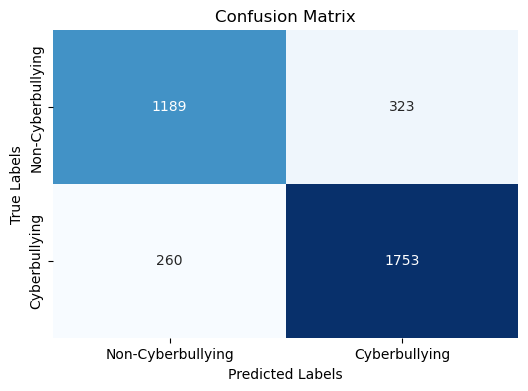

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Cyberbullying', 'Cyberbullying'],
            yticklabels=['Non-Cyberbullying', 'Cyberbullying'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()